# k-means
### Dataset: [Dry_Bean_Dataset.xlsx](../../input/Dry_Bean_Dataset_Citation_Request.txt)

<a id="1"></a>
## Import modules

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import plotly.express as px


<a id="2"></a>
## Loading dataset

In [13]:
filename = '../../input/Dry_Bean_Dataset.xlsx'
try:
    df = pd.read_excel(filename)
except FileNotFoundError:
    print("File not found. Check the file path and try again.")

print(df.head())

print("Column names:", df.columns.tolist())

features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity']
target = 'Class'

if not all(feature in df.columns for feature in features):
    print("One or more feature columns are missing in the DataFrame.")
else:
    X = df[features].values

if target not in df.columns:
    print(f"The target column '{target}' is missing in the DataFrame.")
else:
    y = df[target].values

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

<a id="3"></a>
## Standardize the data

In [14]:
X_norm = StandardScaler().fit_transform(X)

print(X_norm)

[[-0.84074853 -1.1433189  -1.30659814 -0.63115304 -1.56505251 -2.18572039]
 [-0.82918764 -1.01392388 -1.39591111 -0.43444458 -1.96978438 -3.68603953]
 [-0.80715717 -1.07882906 -1.25235661 -0.58573461 -1.51429132 -2.04533608]
 ...
 [-0.37203825 -0.44783294 -0.45047814 -0.24645586 -0.4486176  -0.18293961]
 [-0.37176543 -0.42702856 -0.42897404 -0.26674226 -0.38073532 -0.10695995]
 [-0.37135619 -0.38755718 -0.2917356  -0.44622403  0.14837437  0.38911648]]


<a id="4"></a>
## Get the K value

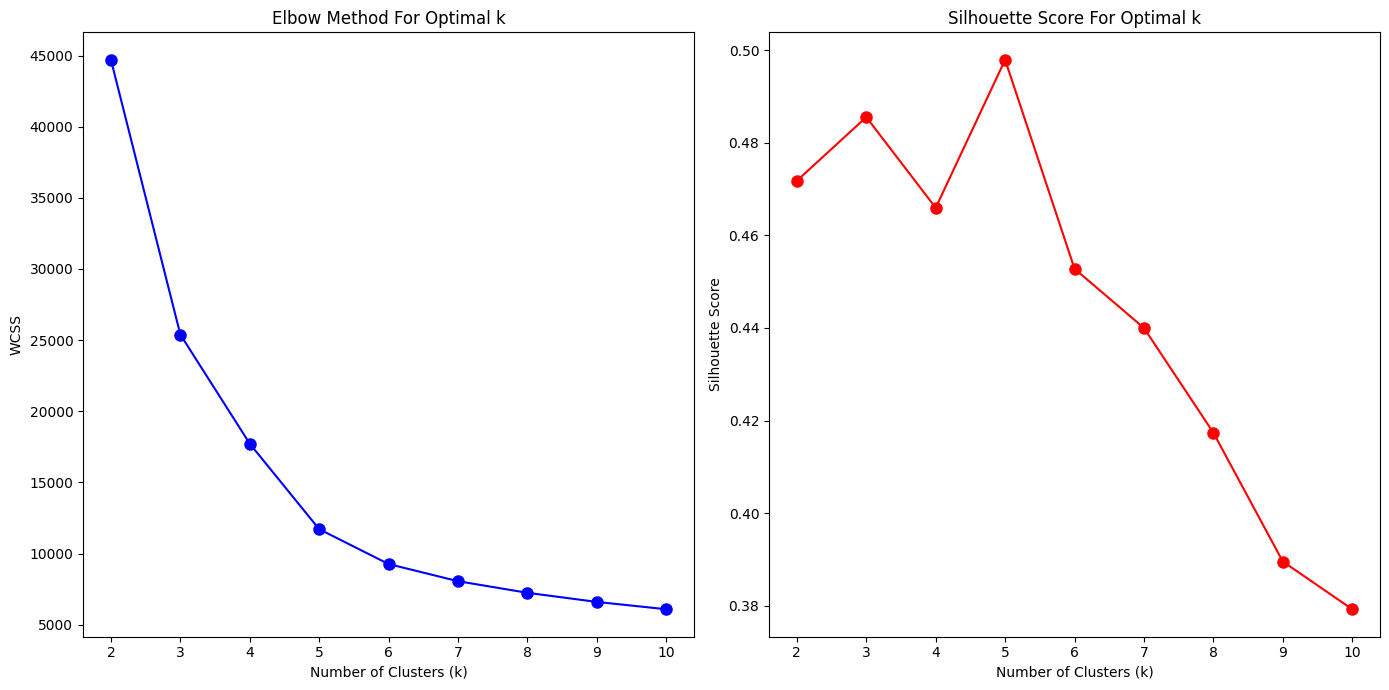

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

range_n_clusters = range(2, 11)  
wcss = []
silhouette_avg = []

for n_clusters in range_n_clusters:
    # explicitly setting the n_init parameter to avoid the warning
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(X_norm)
    
    # the silhouette_score gives the average value for all the samples.
    silhouette_avg.append(silhouette_score(X_norm, cluster_labels))
    
    # inertia: Sum of squared distances of samples to their closest cluster center
    wcss.append(clusterer.inertia_)


# plotting the Elbow Method graph
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, 'bo-', markersize=8)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# plotting the Silhouette Scores graph
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_avg, 'ro-', markersize=8)
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# based on these plots, choose the optimal k (4)


<a id="6"></a>
## Visualize 2D Projection

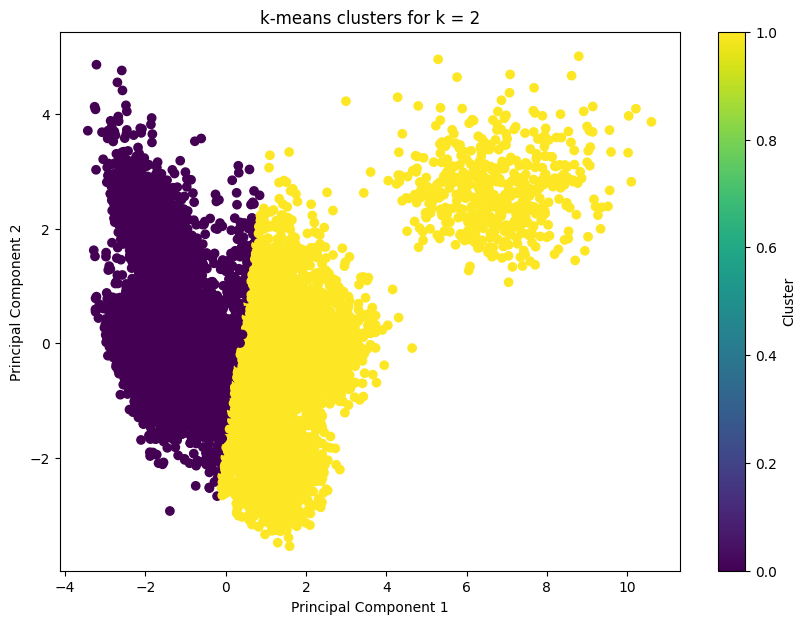

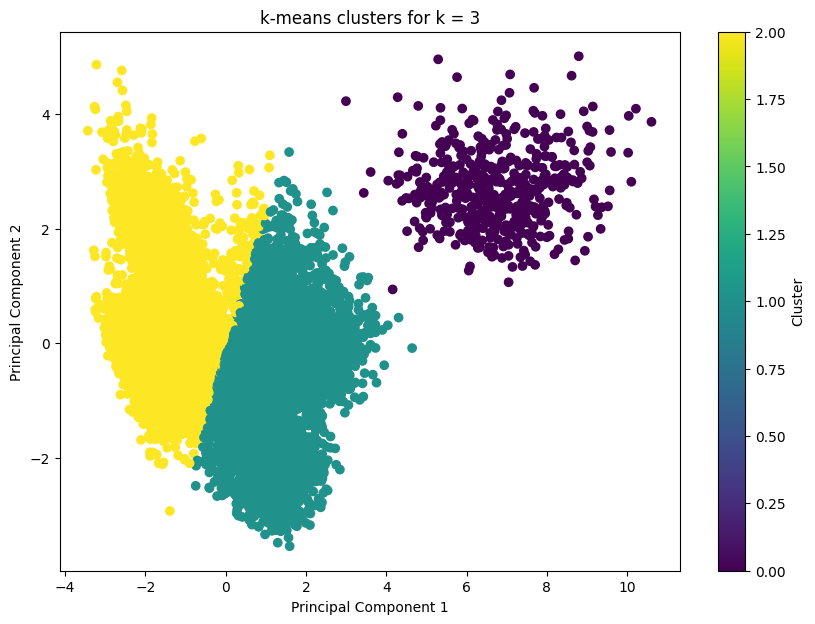

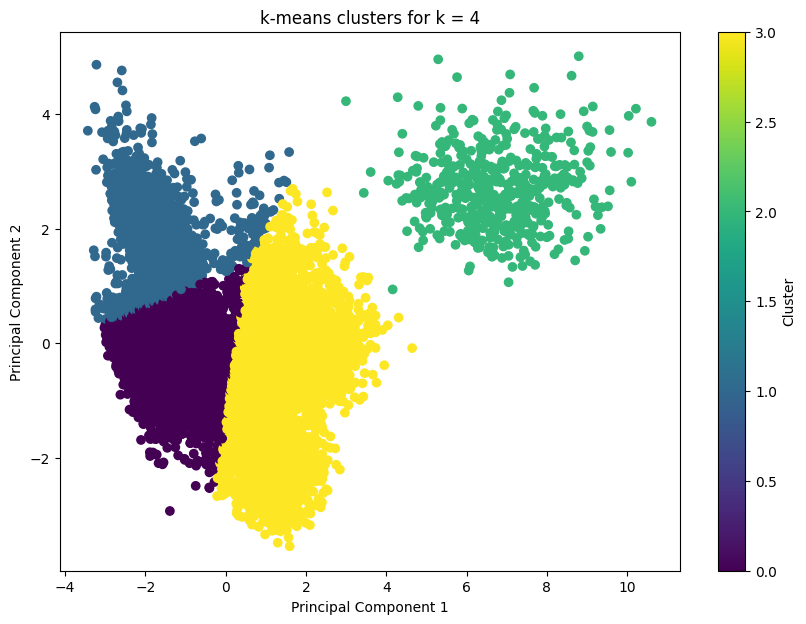

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_norm)

real_labels = y.flatten()  # 'y' is already a NumPy array with real class labels
n_real_classes = np.unique(real_labels).size

# apply k-means for k = 2, 3, 4 and plot
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_norm)  # use X_norm for fitting

    # plot the k-means clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title(f'k-means clusters for k = {k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
    
    # if k equals the real number of classes, compute the confusion matrix
    if k == n_real_classes:
        # building the confusion matrix
        cm = confusion_matrix(real_labels, kmeans_labels)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for k = {k}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()
